In [1]:
%matplotlib inline

In [2]:
from pprint import pprint

import datetime

import pymc
import numpy as np
import spacepy.plot as spp # for the style
import matplotlib.pyplot as plt
import spacepy.toolbox as tb
import spacepy.plot as spp


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
print(datetime.datetime.now())

2016-09-08 17:17:39.782281


In [4]:
# test data

case = {
    'a':[31., 1., 1.], 
    'b':[60.,20.,1.], 
    'c':[60.,1.,1/30], 
    'd':[60.,3000., 100.], 
    'e':[170.,172.,1.]
}


In [5]:

for c in sorted(case.keys()):

    #priors
    s = pymc.Uniform('s', 0.0, 1e4)
    bkg = pymc.Uniform('bkg', 0, 1e4)

    # model
    obstot = pymc.Poisson('obstot', s+bkg/case[c][2], observed=True, value=case[c][0])
    obsbkg = pymc.Poisson('obsbkg', bkg, observed=True, value=case[c][1])

    model = pymc.MCMC((s, bkg, obstot, obsbkg))
    model.sample(50000, 1000, burn_till_tuned=True, thin=20, progress_bar=False)
    print('{0}    {1:.2}    {2:.2}    {3:.2}    {4:.2} +/- {5:.2}     {6:.2} +/- {7:.2}'.format(c, 
                                                                          case[c][0], 
                                                                          case[c][1], 
                                                                          case[c][2], 
                                                                          bkg.stats()['mean']*case[c][2], 
                                                                          bkg.stats()['standard deviation']*case[c][2], 
                                                                          s.stats()['mean'], 
                                                                          s.stats()['standard deviation'], 
                                                                          ))


a    3.1e+01    1.0    1.0    1.9 +/- 1.4     3e+01 +/- 5.9
b    6e+01    2e+01    1.0    2.1e+01 +/- 4.6     4e+01 +/- 9.1
c    6e+01    1.0    0.033    0.036 +/- 0.018     2.9e+01 +/- 1.7e+01
d    6e+01    3e+03    1e+02    3e+05 +/- 5.4e+03     3.1e+01 +/- 7.8
e    1.7e+02    1.7e+02    1.0    1.7e+02 +/- 1.1e+01     1.4e+01 +/- 1.1e+01


Plotting s
Plotting bkg


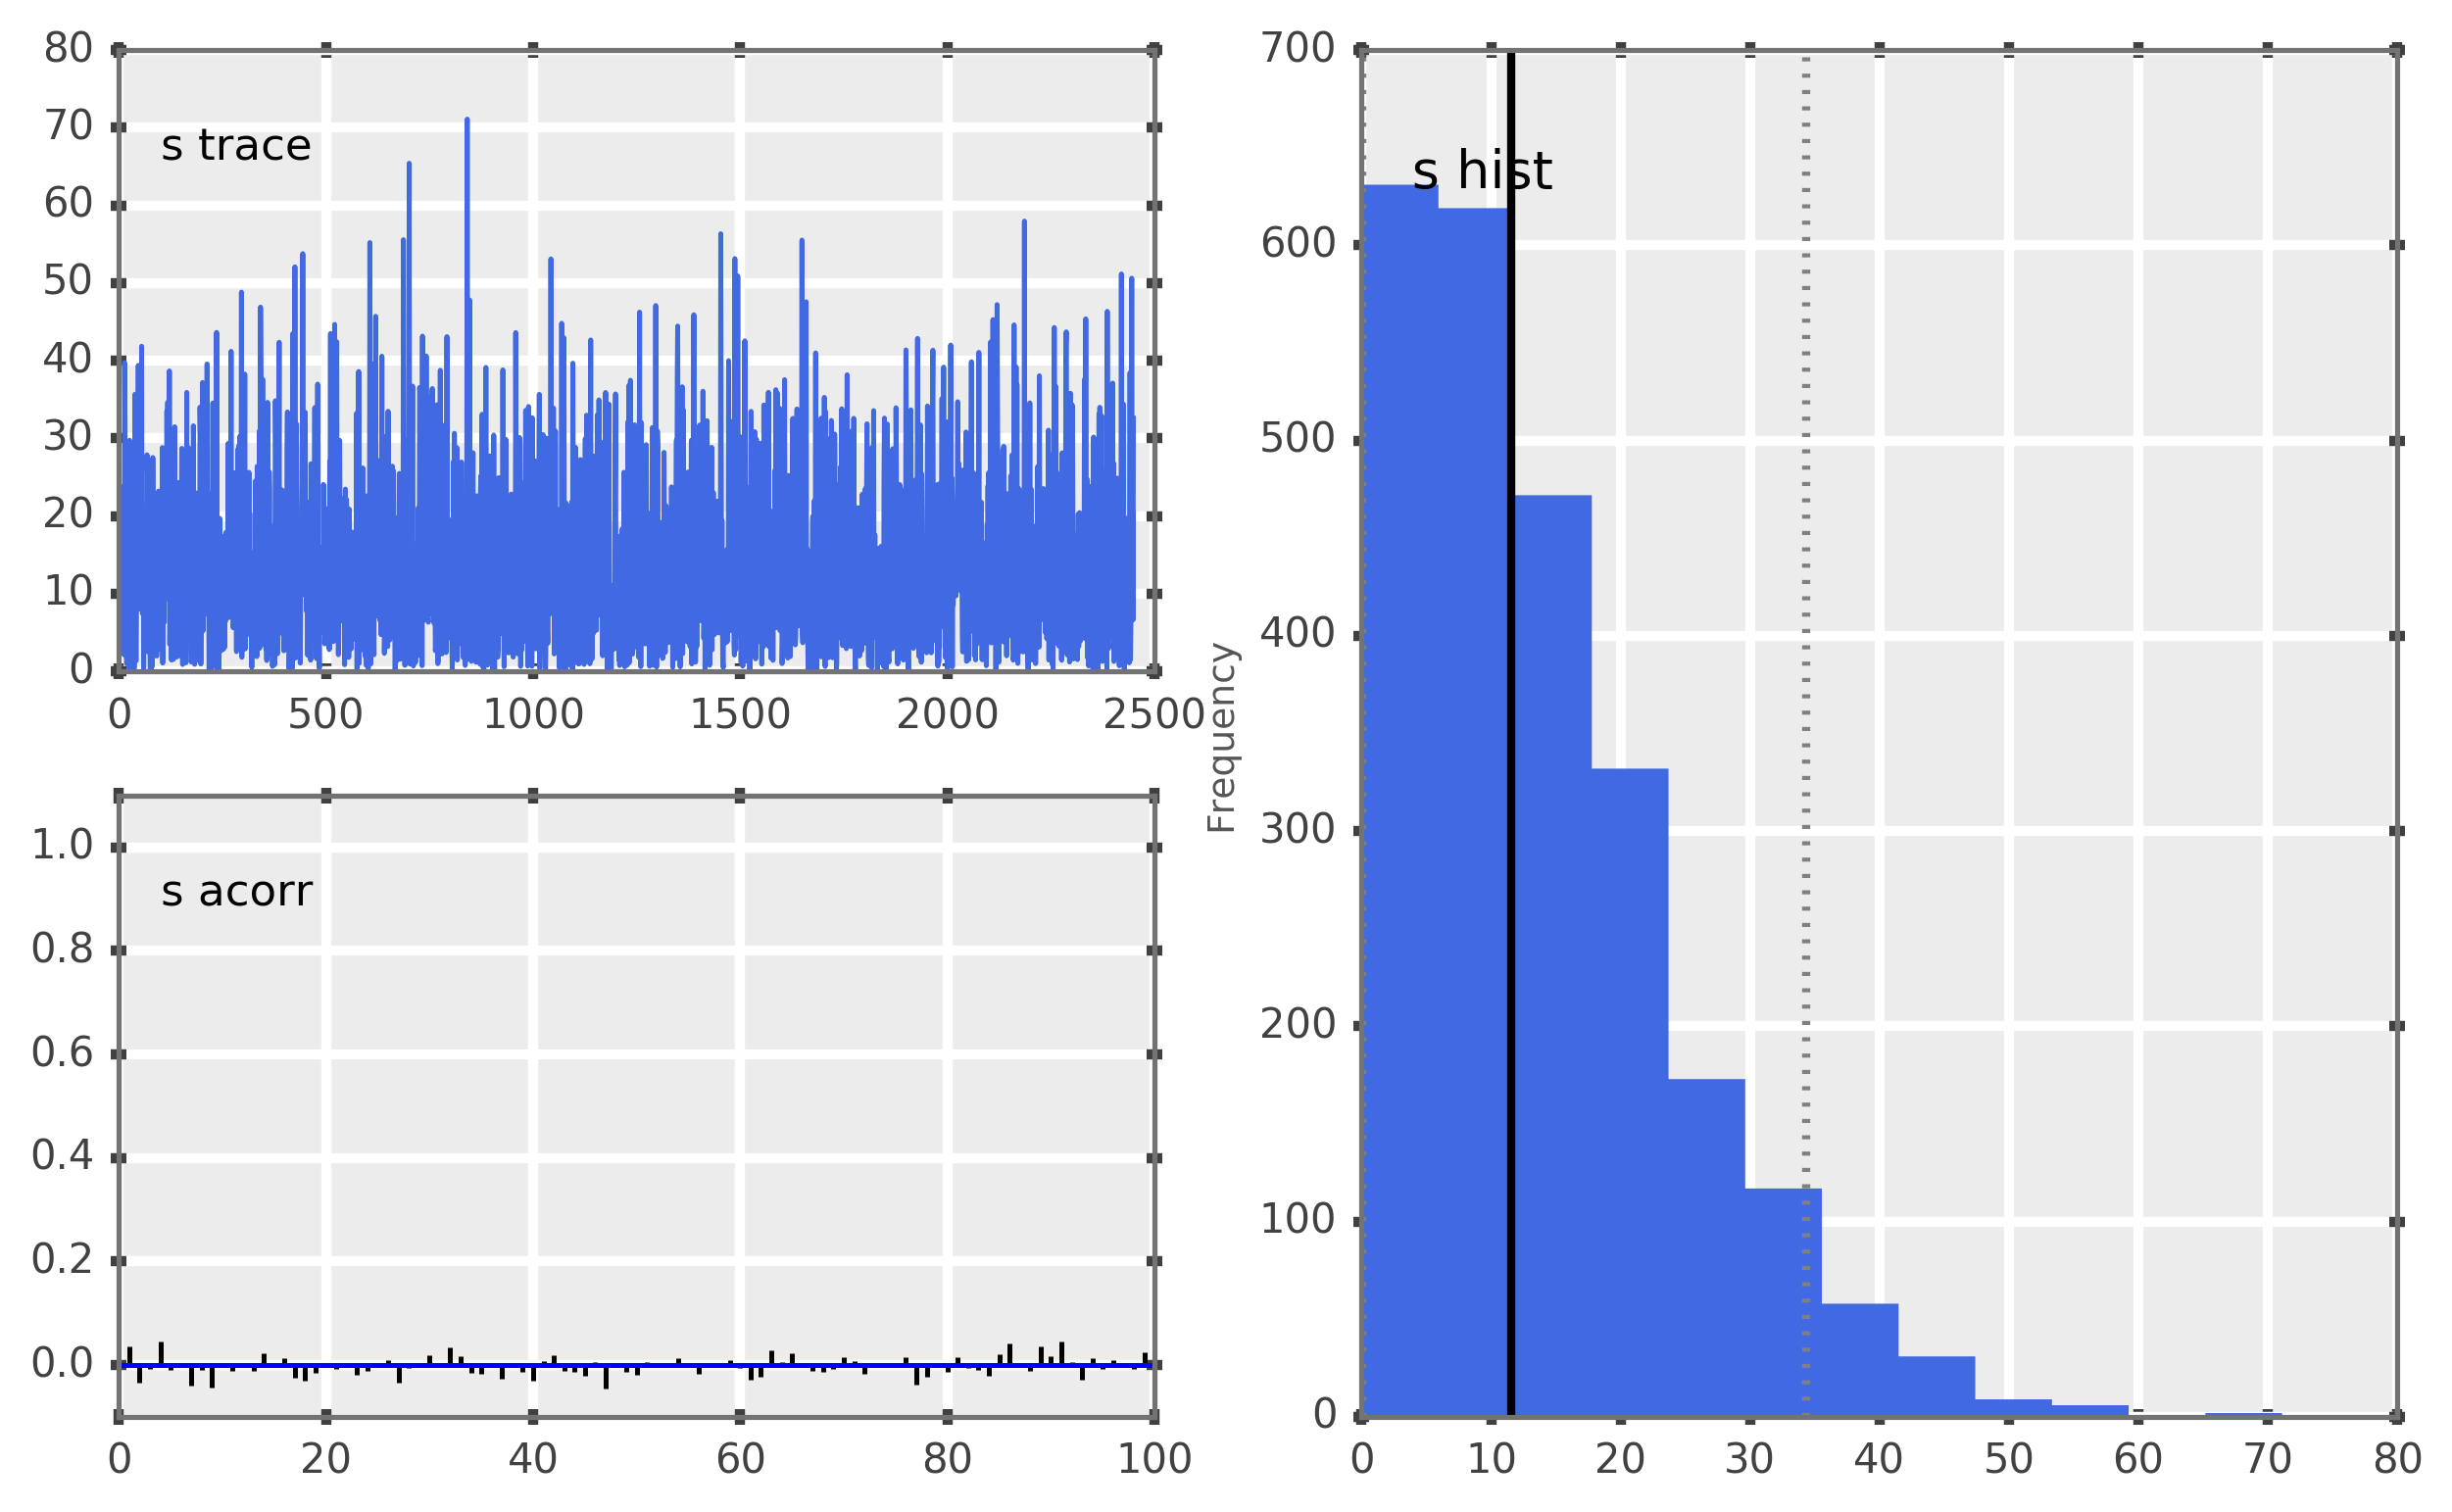

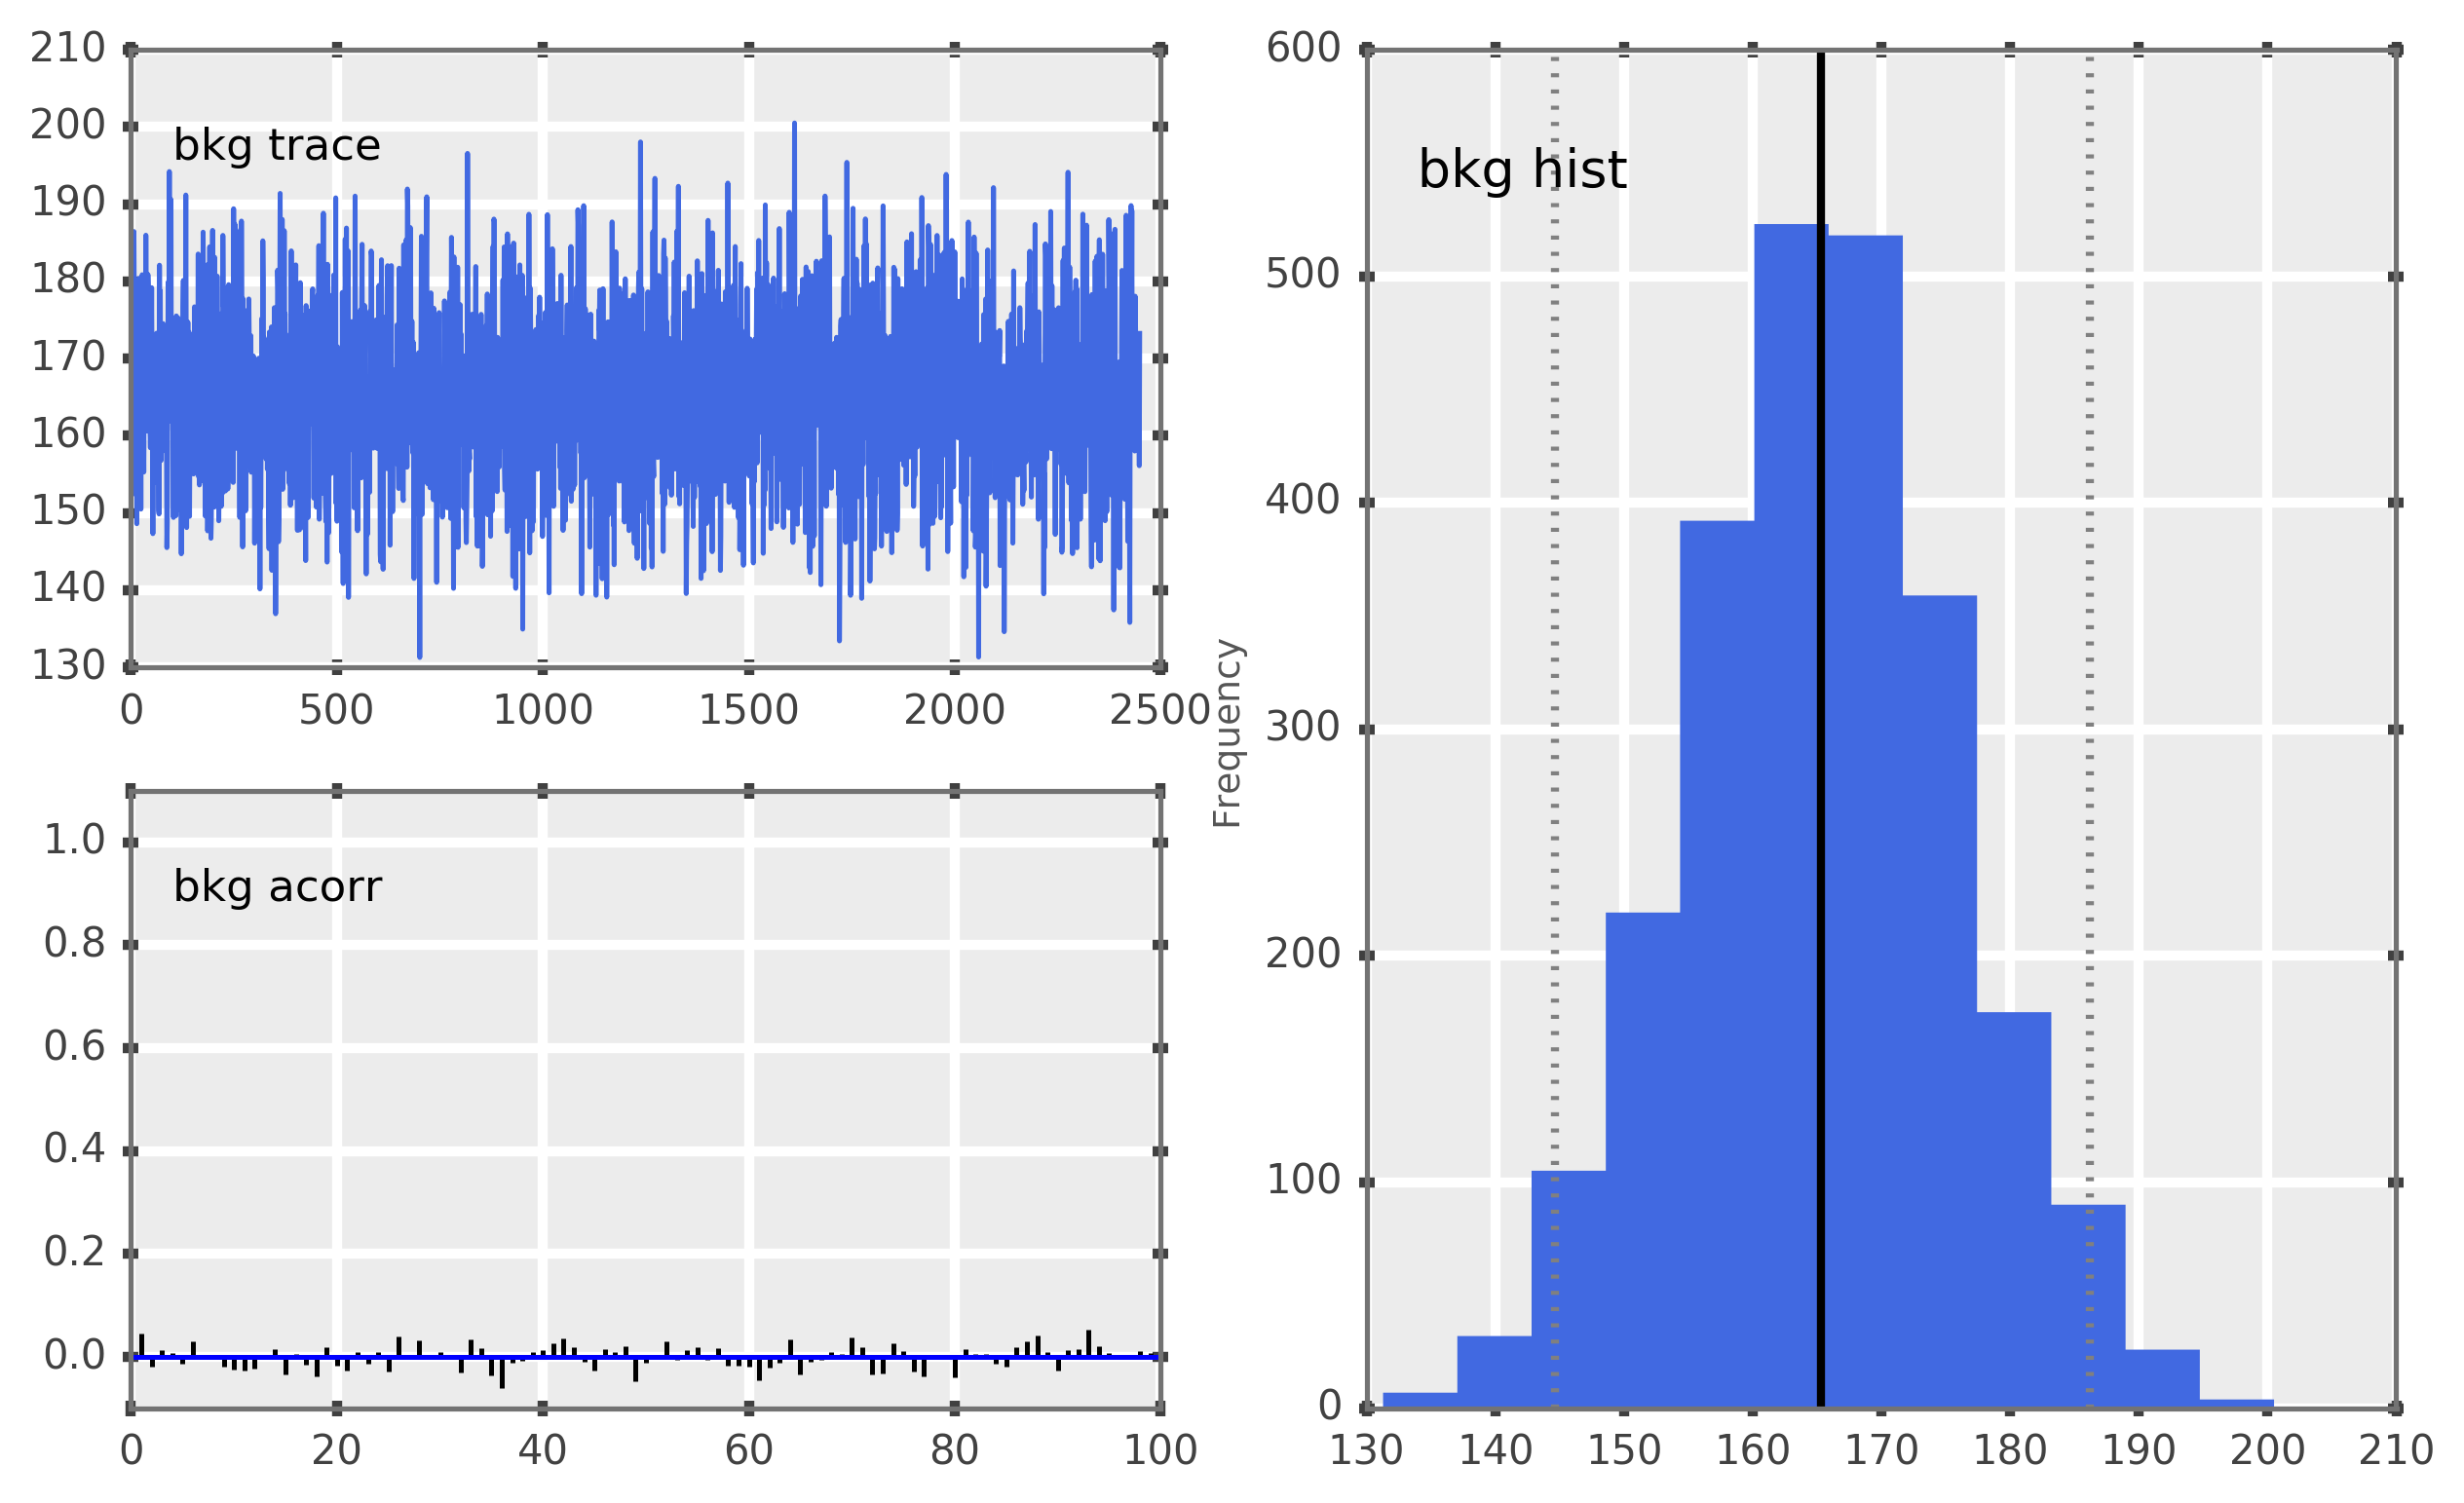

In [6]:
pymc.Matplot.plot(model)


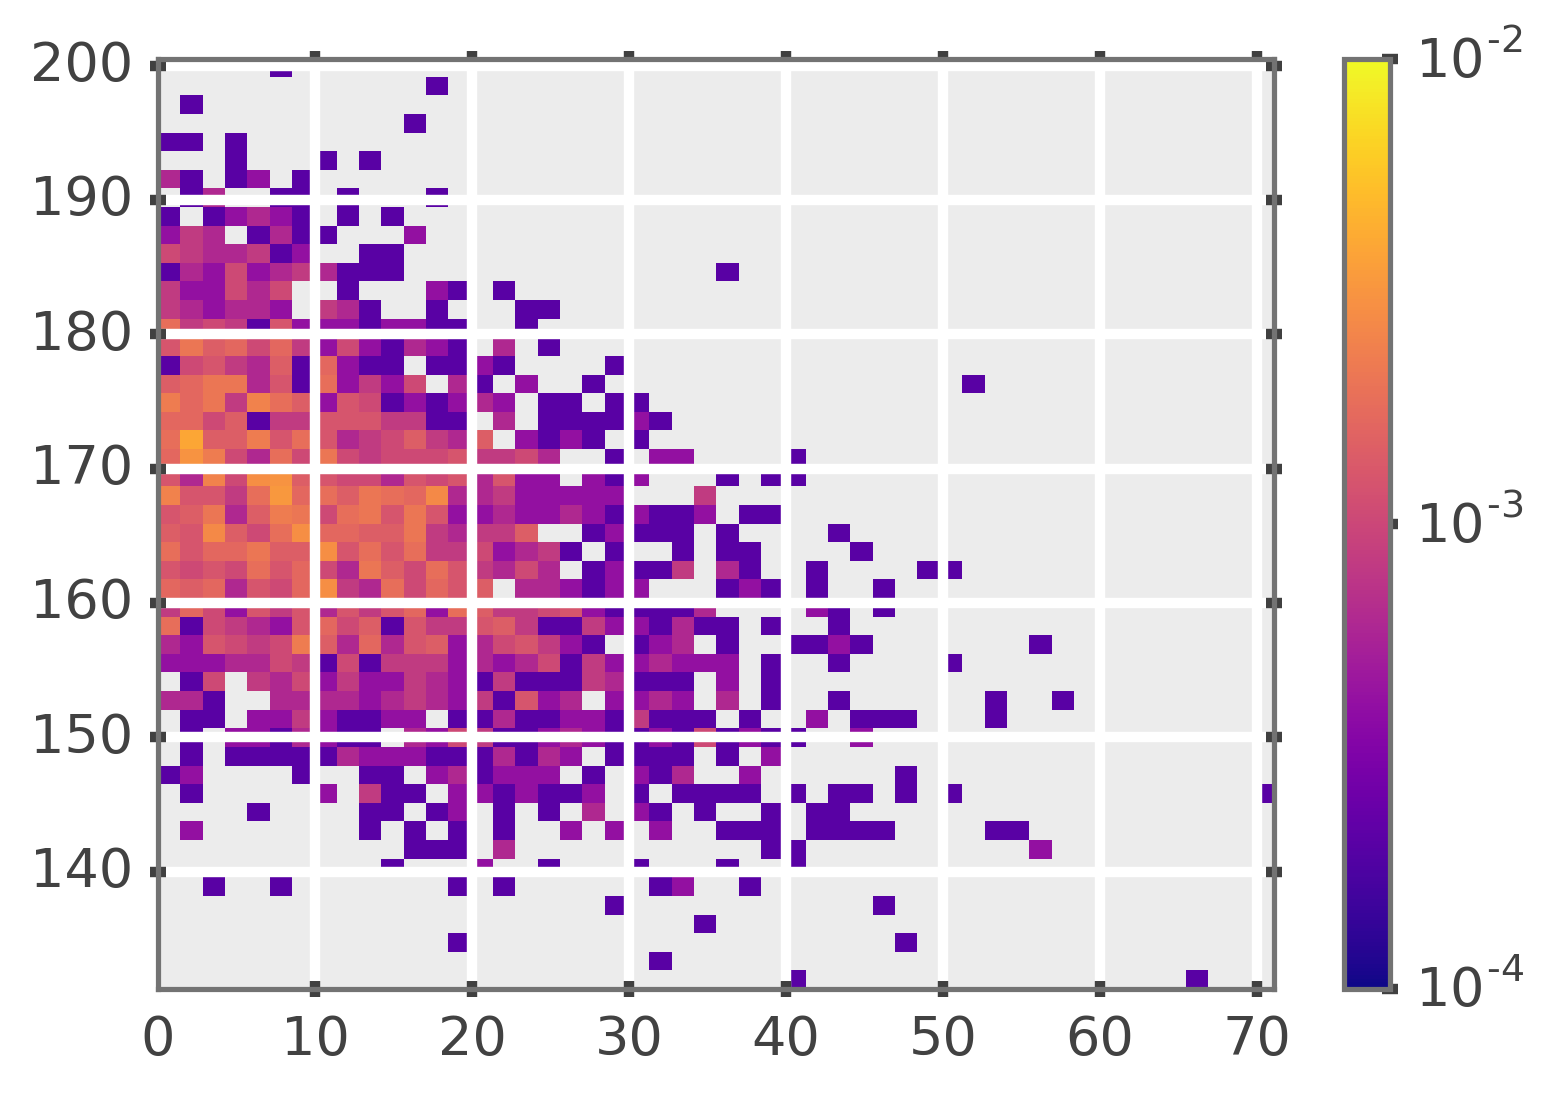

In [7]:
from matplotlib.colors import LogNorm
_ = spp.plt.hist2d(s.trace()[:], bkg.trace()[:], bins=50, normed=True, norm=LogNorm(), vmin=1e-4, vmax=1e-2)
spp.plt.colorbar()